In [25]:
import pandas as pd

### Preprocess metadata

In [41]:
def preprocess_experiment_metadata(experiment_metadata: pd.DataFrame):
    mapping = {
    "Somewhat easy": 1,
    "Extremely easy": 2,
    "Neither easy nor difficult": 3,
    "Somewhat difficult": 4,
    "Extremely difficult": 5,
    }
    renames = {
        "name": "snippet",
        "Perceived Difficulty": "perceived_difficulty",
        "How many years of programming experience do you have with either C++ or Java (as chosen above) ?": "years_of_experience",
    }
    df = experiment_metadata[list(renames.keys()) + ["pid", "tid"]].rename(
        columns=renames
    ).dropna()
    df['coded_perceived_difficulty'] = df['perceived_difficulty'].map(mapping)
    dtypes = {
        "pid": "category",
        "tid": "category",
        "perceived_difficulty": "category",
        "snippet": "category",
        "years_of_experience": "float",
    }
    df.loc[df['years_of_experience'] == '6-ish?', 'years_of_experience'] = 6

    df = df.query("snippet != 'distance'")
    return df.astype(dtypes).set_index(['pid', 'tid'])


experiment_metadata = pd.read_csv("../data/raw/post_experiment_survey.csv")
df = preprocess_experiment_metadata(experiment_metadata)
df.to_parquet("../data/processed/experiment_metadata.parq")

### Descriptive Stats

In [42]:
df =  pd.read_parquet("../data/processed/experiment_metadata.parq")
df.head()

snippet        perceived_difficulty  years_of_experience  \
pid  tid                                                                    
p40  t1      numbers_hrn               Somewhat easy                  3.0   
p100 t4   insertion_sort               Somewhat easy                  2.0   
     t2        rectangle              Extremely easy                  2.0   
     t3      calculation  Neither easy nor difficult                  2.0   
p41  t2      numbers_hrn               Somewhat easy                  1.0   

          coded_perceived_difficulty  
pid  tid                              
p40  t1                            1  
p100 t4                            1  
     t2                            2  
     t3                            3  
p41  t2                            1

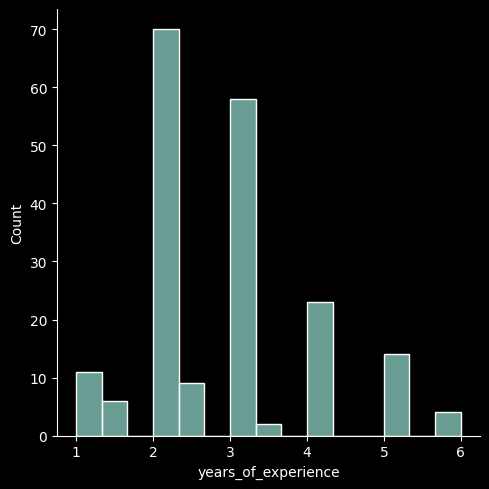

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=df, x='years_of_experience',)

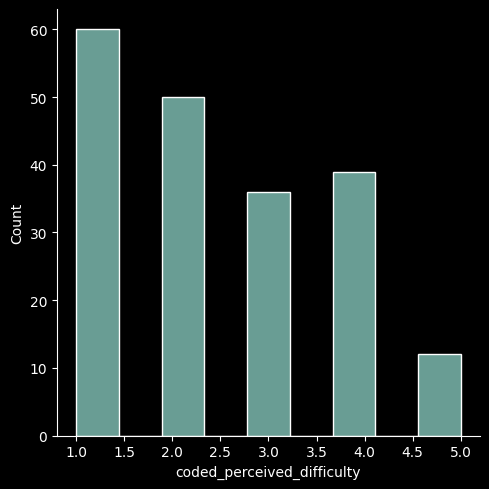

In [44]:
sns.displot(data=df, x='coded_perceived_difficulty')

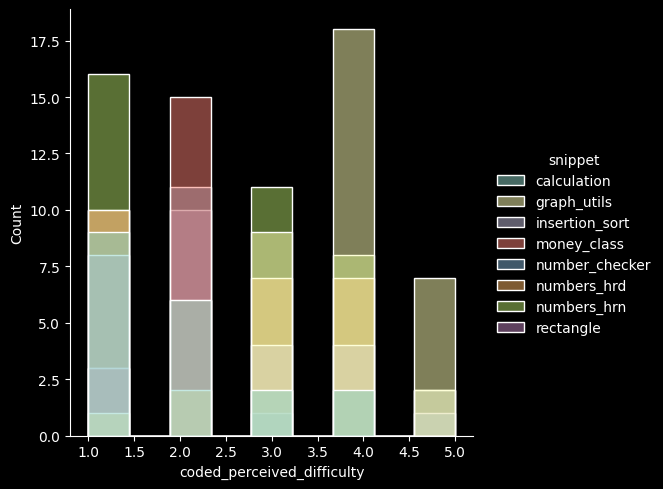

In [45]:
sns.displot(data=df, x='coded_perceived_difficulty', hue='snippet')

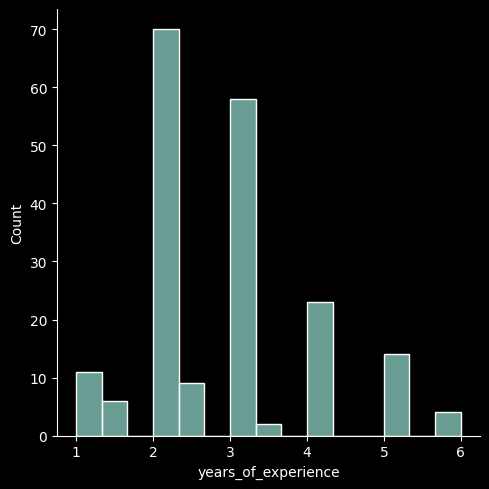

In [46]:
sns.displot(data=df, x='years_of_experience',)

In [50]:
df.groupby(['snippet'])['coded_perceived_difficulty'].describe()

,count,mean,std,min,25%,50%,75%,max
snippet,,,,,,,,
calculation,19.0,1.842105,1.014515,1.0,1.0,2.0,2.0,4.0
graph_utils,37.0,3.756757,0.925125,1.0,3.0,4.0,4.0,5.0
insertion_sort,18.0,2.555556,1.542428,1.0,1.0,3.0,4.0,5.0
money_class,18.0,1.833333,0.383482,1.0,2.0,2.0,2.0,2.0
number_checker,16.0,2.062500,0.928709,1.0,2.0,2.0,2.0,5.0
numbers_hrd,30.0,2.366667,1.188547,1.0,1.0,2.0,3.0,4.0
numbers_hrn,37.0,2.459459,1.386334,1.0,1.0,3.0,4.0,5.0
rectangle,22.0,1.636364,0.657952,1.0,1.0,2.0,2.0,3.0


In [51]:
df

snippet        perceived_difficulty  years_of_experience  \
pid  tid                                                                    
p40  t1      numbers_hrn               Somewhat easy                  3.0   
p100 t4   insertion_sort               Somewhat easy                  2.0   
     t2        rectangle              Extremely easy                  2.0   
     t3      calculation  Neither easy nor difficult                  2.0   
p41  t2      numbers_hrn               Somewhat easy                  1.0   
...                  ...                         ...                  ...   
p99  t1      calculation  Neither easy nor difficult                  3.0   
     t4   insertion_sort          Somewhat difficult                  3.0   
     t2      money_class              Extremely easy                  3.0   
p98  t3   number_checker              Extremely easy                  2.0   
p99  t3        rectangle               Somewhat easy                  3.0   

          coded_perceived_difficulty  
pid  tid                              
p40  t1                            1  
p100 t4                            1  
     t2                            2  
     t3                            3  
p41  t2                            1  
...                              ...  
p99  t1                            3  
     t4                            4  
     t2                            2  
p98  t3                            2  
p99  t3                            1  

[197 rows x 4 columns]